In [101]:
import pandas as pd

In [102]:
applications = pd.read_csv("D:\\Documents\\GO.IT\\applications.csv")

In [103]:
industries = pd.read_csv("D:\\Documents\\GO.IT\\industries.csv")

In [104]:
applications_df = pd.DataFrame(applications)

In [105]:
industries_df = pd.DataFrame(industries)

In [106]:
applications_df.drop_duplicates(subset='applicant_id', keep='first', inplace=True)

In [107]:
applications_df['External Rating'].fillna(0, inplace=True)

In [108]:
applications_df['Education level'].fillna('Average', inplace=True)

In [109]:
applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3


In [110]:
industries_df.head()

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


In [111]:
merged_df = applications_df.merge(industries_df, on='Industry', how='outer')

In [112]:
merged_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:30:00,NaN,22,Male,Blockchain,Single,2.0,Still a university student,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0
2,11.30.2022 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0
3,11.30.2022 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0
4,11.30.2022 10:46:30,8550.0,40,Male,Blockchain,Married,1.0,"Higher Degree (bachelor's, specialist's, maste...","France, Paris",056d0a80808828a4d4017224fd17491e,0


In [113]:
merged_df['Evaluation'] = 0

In [114]:
import numpy as np

In [115]:
merged_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,0
1,11.30.2022 10:30:00,NaN,22,Male,Blockchain,Single,2.0,Still a university student,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,0
2,11.30.2022 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0,0
3,11.30.2022 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0,0
4,11.30.2022 10:46:30,8550.0,40,Male,Blockchain,Married,1.0,"Higher Degree (bachelor's, specialist's, maste...","France, Paris",056d0a80808828a4d4017224fd17491e,0,0


In [116]:
print(merged_df.dtypes)

Applied at          object
Amount             float64
Age                  int64
Gender              object
Industry            object
Marital status      object
External Rating    float64
Education level     object
Location            object
applicant_id        object
Score                int64
Evaluation           int64
dtype: object


In [117]:
import matplotlib.pyplot as plt

In [125]:
merged_df['Applied at'] = pd.to_datetime(merged_df['Applied at'], format='mixed')

In [126]:
print(merged_df.dtypes)

Applied at         datetime64[ns]
Amount                    float64
Age                         int64
Gender                     object
Industry                   object
Marital status             object
External Rating           float64
Education level            object
Location                   object
applicant_id               object
Score                       int64
Evaluation                  int64
dtype: object


In [128]:
merged_df['Evaluation'] += (merged_df['Age'].between(35, 55)) * 20

In [129]:
merged_df['Evaluation'] += (merged_df['Applied at'].dt.dayofweek >= 5) * 20

In [130]:
merged_df['Evaluation'] += (merged_df['Location'].str.contains('Kyiv')) * 10

In [136]:
merged_df['Evaluation'] += merged_df['Score'].clip(0, 20)

In [137]:
merged_df['Evaluation'] += (merged_df['External Rating'] >= 7) * 20

In [138]:
merged_df['Evaluation'] -= (merged_df['External Rating'] <= 2) * 20

In [139]:
merged_df['Evaluation'] += (merged_df['Marital status'] == 'Married') * 20

In [140]:
merged_df.loc[merged_df['Amount'].isna() | (merged_df['External Rating'] == 0), 'Evaluation'] = 0

In [141]:
merged_df['Evaluation'] = merged_df['Evaluation'].clip(0, 100)

In [142]:
merged_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation
0,2022-11-30 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,60
1,2022-11-30 10:30:00,NaN,22,Male,Blockchain,Single,2.0,Still a university student,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,0
2,2022-11-30 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0,60
3,2022-11-30 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0,100
4,2022-11-30 10:46:30,8550.0,40,Male,Blockchain,Married,1.0,"Higher Degree (bachelor's, specialist's, maste...","France, Paris",056d0a80808828a4d4017224fd17491e,0,20


In [152]:
successful_applicants = merged_df[merged_df['Evaluation'] > 0]

In [153]:
successful_applicants.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation
0,2022-11-30 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,60
2,2022-11-30 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0,60
3,2022-11-30 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0,100
4,2022-11-30 10:46:30,8550.0,40,Male,Blockchain,Married,1.0,"Higher Degree (bachelor's, specialist's, maste...","France, Paris",056d0a80808828a4d4017224fd17491e,0,20
5,2022-11-30 10:48:36,8400.0,27,Male,Blockchain,Married,6.0,"Higher Degree (bachelor's, specialist's, maste...","Belgium, Brussels",56f735f424804136be23a2c0cce2ac65,0,40


In [154]:
merged_df['Applied at'] = pd.to_datetime(merged_df['Applied at'], format='mixed', errors='coerce')

In [156]:
merged_df.head(20)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation
0,2022-11-30 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,60
1,2022-11-30 10:30:00,NaN,22,Male,Blockchain,Single,2.0,Still a university student,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,0
2,2022-11-30 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0,60
3,2022-11-30 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0,100
4,2022-11-30 10:46:30,8550.0,40,Male,Blockchain,Married,1.0,"Higher Degree (bachelor's, specialist's, maste...","France, Paris",056d0a80808828a4d4017224fd17491e,0,20
5,2022-11-30 10:48:36,8400.0,27,Male,Blockchain,Married,6.0,"Higher Degree (bachelor's, specialist's, maste...","Belgium, Brussels",56f735f424804136be23a2c0cce2ac65,0,40
6,2022-11-30 10:48:58,5400.0,19,Male,Blockchain,Married,1.0,Still a university student,Other,a4ba22c3ed6b416d74a4c348a1b83e21,0,0
7,2022-11-30 10:50:22,15000.0,21,Male,Blockchain,Married,2.0,"Higher Degree (bachelor's, specialist's, maste...","Sweden, Stockholm",a81709423dab2becccc2cffa5ed16b89,0,0
8,2022-11-30 10:58:52,9300.0,27,Male,Blockchain,Married,5.0,Second Higher Degree,"Slovakia, Bratislava",91b22f336ece068e94b371c104e25daf,0,40
9,2022-11-30 11:15:34,10500.0,45,Male,Blockchain,Other,10.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",20a6dc00bcf7cc124507376952d8a539,0,100


In [157]:
print(merged_df[merged_df['Applied at'].isnull()])

Empty DataFrame
Columns: [Applied at, Amount, Age, Gender, Industry, Marital status, External Rating, Education level, Location, applicant_id, Score, Evaluation]
Index: []


In [158]:
merged_df['Week'] = merged_df['Applied at'].dt.isocalendar().week

In [160]:
weekly_evaluation_mean = merged_df.groupby('Week')['Evaluation'].mean()

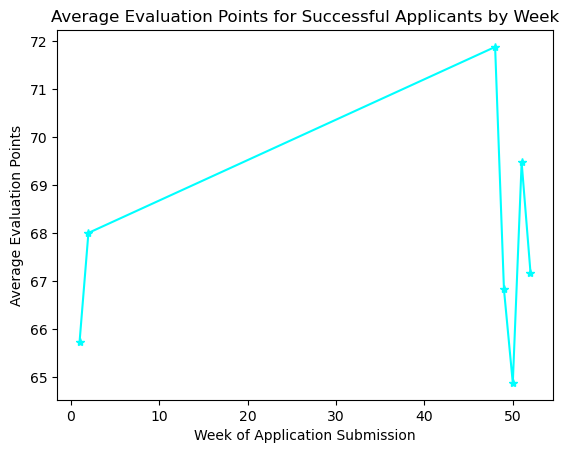

In [164]:
plt.plot(weekly_evaluation_mean.index, weekly_evaluation_mean.values, marker='*', color = 'cyan')
plt.title('Average Evaluation Points for Successful Applicants by Week')
plt.xlabel('Week of Application Submission')
plt.ylabel('Average Evaluation Points')
plt.show()